In [1]:
# 기본 패키지 불러오기 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns 
plt.style.use("seaborn")
sns.set(font_scale=1)
sns.set_style("whitegrid")

# 그래프를 노트북 안에 그리기 위해 설정
%matplotlib inline

# 맥 OS 폰트 깨짐 방지 코드
from matplotlib import rc
import matplotlib as mpl 
import matplotlib.font_manager as fm 

rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

# 데이터 준비

## 데이터 불러오기

In [2]:
# 데이터 불러오기
london_lists_raw = pd.read_csv('../../../../data_weekly/inside_airbnb/London/listings.csv')
london_lists_summary_raw = pd.read_csv('../../../../data_weekly/inside_airbnb/London/listings_outline.csv')
london_neighbourhoods_raw = pd.read_csv('../../../../data_weekly/inside_airbnb/London/neighbourhoods.csv')
london_reviews_raw = pd.read_csv('../../../../data_weekly/inside_airbnb/London/reviews.csv')
london_reviews_summary_raw = pd.read_csv('../../../../data_weekly/inside_airbnb/London/reviews_outline.csv')

# 분석할 df 별도 복사
london_lists = london_lists_raw.copy()
london_reviews = london_reviews_raw.copy()

# 출력
london_lists.head()

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,312761,https://www.airbnb.com/rooms/312761,20240319050633,2024-03-21,city scrape,Spacious Central London Apartment by Hoxton Sq...,"Very central location, in the middle of Shored...",Everything is so convenient and the area is al...,https://a0.muscache.com/pictures/miso/Hosting-...,1608226,...,5.00,4.89,4.93,NaN,f,1,1,0,0,0.86
1,13913,https://www.airbnb.com/rooms/13913,20240319050633,2024-03-20,city scrape,Holiday London DB Room Let-on going,My bright double bedroom with a large window h...,Finsbury Park is a friendly melting pot commun...,https://a0.muscache.com/pictures/miso/Hosting-...,54730,...,4.83,4.70,4.70,NaN,f,3,2,1,0,0.25
2,15400,https://www.airbnb.com/rooms/15400,20240319050633,2024-03-20,city scrape,Bright Chelsea Apartment. Chelsea!,Lots of windows and light. St Luke's Gardens ...,It is Chelsea.,https://a0.muscache.com/pictures/428392/462d26...,60302,...,4.83,4.93,4.74,NaN,f,1,1,0,0,0.54
3,159736,https://www.airbnb.com/rooms/159736,20240319050633,2024-03-20,city scrape,A double Room 5mins from King's College Hospital,Calm sunny double room with a queen size bed a...,We love that in Loughborough Junction we live ...,https://a0.muscache.com/pictures/1067303/d2300...,766056,...,4.89,4.34,4.66,NaN,f,4,0,4,0,0.62
4,165336,https://www.airbnb.com/rooms/165336,20240319050633,2024-03-21,city scrape,Charming Flat in Notting Hill,A stylish apartment close to Portobello market...,"Notting Hill has many cafes, bars and restaura...",https://a0.muscache.com/pictures/60757460/47f8...,761400,...,4.96,4.87,4.71,NaN,f,1,1,0,0,1.57


## 데이터 불러온 최종일자 확인 

In [3]:
london_lists_raw['last_scraped'].unique()

array(['2024-03-21', '2024-03-20', '2024-03-22', '2024-03-19'],
      dtype=object)

슈퍼호스트 선정 기준 날짜 년 4회(분기별)
- 1월 1일 / 4월 1일 / 7월 1일 / 10월 1일 

## 분석에서 사용하지 않을 컬럼 삭제
- 추가한 컬럼 : description, host_has_profile_pic, host_identity_verified

In [4]:
# 1차 선별한 컬럼 25개 중 22개 2차 선별 + 1개(숙소_예약가능_여부)
# 최근 리뷰가 작성되었는지를 보기 위해 2개 컬럼 추가_240529 >> 'number_of_reviews_ltm' // 'last_review'
# 'listing_url' 컬럼 london_lists에 적용_240530
# 240602_추가한 컬럼 : description, host_has_profile_pic, host_identity_verified


columns_selected = ['id', 'listing_url', 'description', 'host_id', 'host_response_time', 'host_response_rate', 'host_is_superhost', 'host_total_listings_count', 'host_has_profile_pic', 'host_identity_verified', 'neighbourhood_cleansed', 'property_type', \
    'room_type', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'amenities', 'price', 'has_availability', 'number_of_reviews', 'number_of_reviews_ltm', 'number_of_reviews_l30d', 'last_review', 'review_scores_rating', 'review_scores_accuracy', \
    'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value', 'reviews_per_month']

# 'host_acceptance_rate', 'minimum_nights', 'maximum_nights', 'has_availability',

# 선별한 컬럼만 적용
london_lists = london_lists[columns_selected]


# 변수 정리 
london_lists = london_lists.rename(columns={
    'id': '숙소_id',
    'listing_url' : '숙소_url',
    'description' : '숙소_설명',
    'host_id': '호스트_id',
    'host_response_time': '답변_평균시간',
    'host_response_rate': '문의_응답률',
    # 'host_acceptance_rate': '예약_수락률',
    'host_is_superhost': '슈퍼호스트',
    'host_total_listings_count': '숙소_수',
    'host_has_profile_pic' : '프로필_사진',
    'host_identity_verified' : '호스트_신원',
    'neighbourhood_cleansed': '숙소_지역',
    'property_type' : '숙소_특징',
    'room_type': '숙소_유형',
    'accommodates': '수용_인원수',
    'bathrooms': '욕실수',
    'bedrooms': '침실수',
    'beds': '침대수',
    'amenities': '편의시설',
    'price': '숙소_가격',
    # 'minimum_nights': '최소_숙박일',
    # 'maximum_nights': '최대_숙박일',
    'has_availability' : '예약_가능여부',
    'number_of_reviews': '리뷰수',
    'number_of_reviews_ltm' : '12개월_리뷰수',
    'number_of_reviews_l30d': '30일_리뷰수',
    'last_review' : '마지막_리뷰',
    'review_scores_rating': '리뷰점수',
    'review_scores_accuracy': '숙소_정확성_리뷰점수',
    'review_scores_cleanliness': '숙소_청결도_리뷰점수',
    'review_scores_checkin': '숙소_체크인_리뷰점수',
    'review_scores_communication': '숙소_소통_리뷰점수',
    'review_scores_location': '숙소_위치_리뷰점수',
    'review_scores_value': '숙소_가격_리뷰점수',
    'reviews_per_month': '평균_리뷰수'
 
})

# 컬럼명 확인
london_lists.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90852 entries, 0 to 90851
Data columns (total 32 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   숙소_id        90852 non-null  int64  
 1   숙소_url       90852 non-null  object 
 2   숙소_설명        87851 non-null  object 
 3   호스트_id       90852 non-null  int64  
 4   답변_평균시간      57797 non-null  object 
 5   문의_응답률       57797 non-null  object 
 6   슈퍼호스트        90463 non-null  object 
 7   숙소_수         90847 non-null  float64
 8   프로필_사진       90847 non-null  object 
 9   호스트_신원       90847 non-null  object 
 10  숙소_지역        90852 non-null  object 
 11  숙소_특징        90852 non-null  object 
 12  숙소_유형        90852 non-null  object 
 13  수용_인원수       90852 non-null  int64  
 14  욕실수          57894 non-null  float64
 15  침실수          78118 non-null  float64
 16  침대수          57837 non-null  float64
 17  편의시설         90852 non-null  object 
 18  숙소_가격        57885 non-null  object 
 19  예약_가

## 데이터 전처리_아카이브

### 결측치 처리_아카이브 
- 숙소 유형 [Entire home/apt & Private room] 데이터만 선별하지 않음 >> 모든 데이터 사용
- (이외 상세 내용은 가격_관계분석_런던2.ipynb확인요망)

In [5]:
print(f'런던 데이터 전체 개수: {london_lists.shape[0]}개')
print("-" * 60)

# 리뷰수가 0인 데이터 제거
condition_review_0 = london_lists['리뷰수'] == 0
london_lists = london_lists[~condition_review_0]
print(f'리뷰가 0인 데이터 제거 후 데이터 개수: {london_lists.shape[0]}개')
print("-" * 60)

# 카테고리 타입 데이터 비율 및 개수 세는 함수 선언
def CategoricalData_Count_Ratio(name_of_dataframe, name_of_column):

    print(f'전체 숙소 개수: {name_of_dataframe.shape[0]}개')
    print()

    type_list = name_of_dataframe[name_of_column].unique().tolist()

    for type in type_list:
        condition_type = name_of_dataframe[name_of_column] == type
        ratio_type = round((name_of_dataframe[condition_type].shape[0] / name_of_dataframe.shape[0]) * 100, 2)
        print(f'{name_of_column}이 {type}인 숙소의 개수: {name_of_dataframe[condition_type].shape[0]}개')
        print(f'{name_of_column}이 {type}인 숙소의 비율 : {ratio_type}%')
        print()


# # 숙소 유형 [Entire home/apt & Private room] 데이터만 선별
# condition_room_entirehomeapt = london_lists['숙소_유형'] == 'Entire home/apt'
# condition_room_privateroom = london_lists['숙소_유형'] == 'Private room'
# london_lists = london_lists[(condition_room_entirehomeapt | condition_room_privateroom)]
# print('[Entire home/apt / Private room] 데이터만 선별 : ')
# CategoricalData_Count_Ratio(london_lists, '숙소_유형')
# print("-" * 60)

# 예약_가능여부 Null값 제거 및 예약 불가능 숙소 제거
london_lists = london_lists[london_lists["예약_가능여부"].notnull()]
condition_availability_f = london_lists['예약_가능여부'] == 'f'
london_lists = london_lists[~condition_availability_f]
print(f'Null값 제거 및 예약 불가능 숙소 제거 후 데이터 개수: {london_lists.shape[0]}개')
print("-" * 60)

# 숙소 가격 타입 변환 >> float
london_lists['숙소_가격'] = london_lists['숙소_가격'].str.lstrip('$').str.replace(',', '').astype('float')

# 가격 null값 제거 
condition_price_notnull = london_lists['숙소_가격'].notnull()
london_lists = london_lists[condition_price_notnull] 
print(f'가격 Null값 제거 후 데이터 개수: {london_lists.shape[0]}개')
print("-" * 60)

# 슈퍼호스트 결측치 제거
london_lists = london_lists.dropna(subset=['슈퍼호스트'])
print(f'슈퍼호스트 Null값 제거 후 데이터 개수: {london_lists.shape[0]}개')
print("-" * 60)


# 욕실수, 침대수, 침실수 결측치 제거
london_lists = london_lists.dropna(subset=['욕실수', '침실수', '침대수'])
print(f'욕실수, 침실수, 침대수 Null값 제거 후 데이터 개수: {london_lists.shape[0]}개')
print("-" * 60)


# 각 리뷰 점수 컬럼 Null 값 제거 
type_review_null_any = london_lists[['숙소_정확성_리뷰점수', '숙소_청결도_리뷰점수', '숙소_체크인_리뷰점수', '숙소_소통_리뷰점수', '숙소_위치_리뷰점수', '숙소_가격_리뷰점수']].isnull().any(axis=1)
london_lists = london_lists[~type_review_null_any]
print(f'각 리뷰점수 Null값 제거 후 데이터 개수: {london_lists.shape[0]}개')
print("-" * 60)

런던 데이터 전체 개수: 90852개
------------------------------------------------------------
리뷰가 0인 데이터 제거 후 데이터 개수: 65869개
------------------------------------------------------------
Null값 제거 및 예약 불가능 숙소 제거 후 데이터 개수: 64463개
------------------------------------------------------------
가격 Null값 제거 후 데이터 개수: 43720개
------------------------------------------------------------
슈퍼호스트 Null값 제거 후 데이터 개수: 43454개
------------------------------------------------------------
욕실수, 침실수, 침대수 Null값 제거 후 데이터 개수: 43347개
------------------------------------------------------------
각 리뷰점수 Null값 제거 후 데이터 개수: 43325개
------------------------------------------------------------


### 이상치 처리
- 기존 전처리에서 각 숙소_유형 별 상위 10개(개수) 선별하지 않음 >> 모든 데이터 사용
- (이외 이상치 처리 상세 내용은 가격_관계분석_런던2.ipynb확인요망)

In [6]:
# # 각 숙소_유형 별 상위 10개(개수) 숙소_특징 데이터만 선별 
# # 조건 생성
# sorted_PrivateRoom = london_lists.groupby(['숙소_유형', '숙소_특징']).size().reset_index(name='count').sort_values(by=['숙소_유형', 'count'], ascending=False, ignore_index=True)[:28].reset_index(drop=True)
# sorted_EntireHomeApt = london_lists.groupby(['숙소_유형', '숙소_특징']).size().reset_index(name='count').sort_values(by=['숙소_유형', 'count'], ascending=False, ignore_index=True)[28:].reset_index(drop=True)
# sorted_PrivateRoom_top10 = sorted_PrivateRoom['숙소_특징'][:10].values
# sorted_EntireHomeApt_top10 = sorted_EntireHomeApt['숙소_특징'][:10].values
# condition_PrivateRoom_top10 = london_lists['숙소_특징'].isin(sorted_PrivateRoom_top10)
# condition_EntireHomeApt_top10 = london_lists['숙소_특징'].isin(sorted_EntireHomeApt_top10)
# # 데이터 제거
# london_lists = london_lists[(condition_PrivateRoom_top10 | condition_EntireHomeApt_top10)]
# print(f'숙소_유형별 숙소_특징 상위 10개씩 20개 선별 후 데이터 개수: {london_lists.shape[0]}개')
# print("-" * 60)


# 욕실수, 침실수, 침대수 이상치 제거 1
id_39840632 = london_lists['숙소_id'] == 39840632
id_12598766 = london_lists['숙소_id'] == 12598766
london_lists = london_lists[~(id_39840632 | id_12598766)]
print(f'욕실수, 침실수, 침대수 이상치(육안으로 확인) 제거 후 데이터 개수: {london_lists.shape[0]}개')
print("-" * 60)


# 12개월_리뷰수가 0인 경우 제거 
condition_reviewforyear_0 = london_lists['12개월_리뷰수'] == 0
london_lists = london_lists[~condition_reviewforyear_0]
print(f'12개월_리뷰수가 0인 데이터 제거 후 데이터 개수: {london_lists.shape[0]}개')
print("-" * 60)


# 수용인원수 이상치 처리 (숙소 유형별 처리)
accommodates_type_list = london_lists['숙소_유형'].unique().tolist()

def delete_outlier_IQR_InnerFence(column_name):
    # 전역 변수 선언
    global london_lists
    # 숙소 유형별 Inner Fencs Out Lier 제거 
    for type in accommodates_type_list:
        condition_room_type = london_lists['숙소_유형'] == type
        Q1 = london_lists[column_name][condition_room_type].quantile(.25)
        Q3 = london_lists[column_name][condition_room_type].quantile(.75)
        IQR = Q3 - Q1
        condition_accommodates_upper_outliers = london_lists[column_name][condition_room_type] > (Q3 + IQR * 1.5)
        accommodates_upper_outliers = london_lists[condition_room_type][condition_accommodates_upper_outliers]
        upper_outlier_indices = accommodates_upper_outliers.index
        london_lists = london_lists.drop(index=upper_outlier_indices)
        print(f'{type} 데이터 중 {column_name} Upper_outlier 제거 후 데이터 개수 : {london_lists.shape[0]}개')

delete_outlier_IQR_InnerFence('수용_인원수')
print("-" * 60)


# 가격 이상치 처리 (숙소 유형별 처리)

accommodates_type_list = london_lists['숙소_유형'].unique().tolist()

def delete_outlier_IQR_OuterFence(column_name):
    # 전역 변수 선언
    global london_lists
    # 숙소 유형별 Outer Fencs Out Lier 제거 
    for type in accommodates_type_list:
        condition_room_type = london_lists['숙소_유형'] == type
        Q1 = london_lists[column_name][condition_room_type].quantile(.25)
        Q3 = london_lists[column_name][condition_room_type].quantile(.75)
        IQR = Q3 - Q1
        condition_accommodates_upper_outliers = london_lists[column_name][condition_room_type] > (Q3 + IQR * 3)
        accommodates_upper_outliers = london_lists[condition_room_type][condition_accommodates_upper_outliers]
        upper_outlier_indices = accommodates_upper_outliers.index
        london_lists = london_lists.drop(index=upper_outlier_indices)
        print(f'{type} 데이터 중 {column_name} Upper_outlier 제거 후 데이터 개수 : {london_lists.shape[0]}개')

delete_outlier_IQR_OuterFence('숙소_가격')
print("-" * 60)

# 가격이 0원인 숙소 제거 
condition_price_0 = london_lists['숙소_가격'] == 0
london_lists = london_lists[~condition_price_0]
print(f'"숙소_가격"이 0원인 데이터 제거 후 데이터 개수 : {london_lists.shape[0]}개')

욕실수, 침실수, 침대수 이상치(육안으로 확인) 제거 후 데이터 개수: 43323개
------------------------------------------------------------
12개월_리뷰수가 0인 데이터 제거 후 데이터 개수: 38963개
------------------------------------------------------------
Entire home/apt 데이터 중 수용_인원수 Upper_outlier 제거 후 데이터 개수 : 38408개
Private room 데이터 중 수용_인원수 Upper_outlier 제거 후 데이터 개수 : 37681개
Hotel room 데이터 중 수용_인원수 Upper_outlier 제거 후 데이터 개수 : 37678개
Shared room 데이터 중 수용_인원수 Upper_outlier 제거 후 데이터 개수 : 37663개
------------------------------------------------------------
Entire home/apt 데이터 중 숙소_가격 Upper_outlier 제거 후 데이터 개수 : 37123개
Private room 데이터 중 숙소_가격 Upper_outlier 제거 후 데이터 개수 : 36894개
Hotel room 데이터 중 숙소_가격 Upper_outlier 제거 후 데이터 개수 : 36890개
Shared room 데이터 중 숙소_가격 Upper_outlier 제거 후 데이터 개수 : 36878개
------------------------------------------------------------
"숙소_가격"이 0원인 데이터 제거 후 데이터 개수 : 36877개


### 컬럼 데이터 타입 정리

In [7]:
london_lists.columns

Index(['숙소_id', '숙소_url', '숙소_설명', '호스트_id', '답변_평균시간', '문의_응답률', '슈퍼호스트',
       '숙소_수', '프로필_사진', '호스트_신원', '숙소_지역', '숙소_특징', '숙소_유형', '수용_인원수', '욕실수',
       '침실수', '침대수', '편의시설', '숙소_가격', '예약_가능여부', '리뷰수', '12개월_리뷰수', '30일_리뷰수',
       '마지막_리뷰', '리뷰점수', '숙소_정확성_리뷰점수', '숙소_청결도_리뷰점수', '숙소_체크인_리뷰점수',
       '숙소_소통_리뷰점수', '숙소_위치_리뷰점수', '숙소_가격_리뷰점수', '평균_리뷰수'],
      dtype='object')

In [8]:
# 호스트_신원 / 프로필_사진 / 답변_평균시간 / 문의_응답률 컬럼 다시 확인 
new_column_list = ['호스트_신원', '프로필_사진', '답변_평균시간', '문의_응답률']
for new_column in new_column_list:
    print(f'{new_column}의 UNIQUE값:')
    print(london_lists[new_column].unique())
    print(f'{new_column}의 UNIQUE값의 개수: {london_lists[new_column].nunique()}')
    print('-' * 50)

호스트_신원의 UNIQUE값:
['t' 'f']
호스트_신원의 UNIQUE값의 개수: 2
--------------------------------------------------
프로필_사진의 UNIQUE값:
['t' 'f']
프로필_사진의 UNIQUE값의 개수: 2
--------------------------------------------------
답변_평균시간의 UNIQUE값:
['within a few hours' 'within a day' 'within an hour' 'a few days or more'
 nan]
답변_평균시간의 UNIQUE값의 개수: 4
--------------------------------------------------
문의_응답률의 UNIQUE값:
['100%' '86%' '0%' '96%' nan '85%' '91%' '90%' '97%' '80%' '95%' '93%'
 '84%' '71%' '67%' '62%' '92%' '75%' '13%' '7%' '33%' '89%' '70%' '60%'
 '50%' '63%' '77%' '25%' '40%' '98%' '88%' '57%' '10%' '99%' '94%' '48%'
 '83%' '56%' '52%' '20%' '29%' '87%' '11%' '81%' '65%' '27%' '30%' '73%'
 '78%' '58%' '14%' '46%' '64%' '79%' '38%' '22%' '43%' '76%' '82%' '72%'
 '26%' '36%' '59%' '17%' '55%' '35%' '47%' '44%' '74%' '68%' '3%' '53%'
 '42%' '69%' '5%' '19%' '8%' '9%' '21%' '61%']
문의_응답률의 UNIQUE값의 개수: 79
--------------------------------------------------


In [9]:
# 컬럼 데이터 타입 변환 

# ID => 문자로 변환
london_lists['숙소_id'] = london_lists['숙소_id'].astype('str')
london_lists['호스트_id'] = london_lists['호스트_id'].astype('str')

# 숙소_지역, 숙소_특징, 숙소_유형 >> 범주형 데이터로 변환 
for column in ['슈퍼호스트', '숙소_지역', '숙소_특징', '숙소_유형', '호스트_신원', '프로필_사진', '답변_평균시간']:
    london_lists[column] = london_lists[column].astype('category')

In [10]:
london_lists.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36877 entries, 0 to 90735
Data columns (total 32 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   숙소_id        36877 non-null  object  
 1   숙소_url       36877 non-null  object  
 2   숙소_설명        36249 non-null  object  
 3   호스트_id       36877 non-null  object  
 4   답변_평균시간      34197 non-null  category
 5   문의_응답률       34197 non-null  object  
 6   슈퍼호스트        36877 non-null  category
 7   숙소_수         36877 non-null  float64 
 8   프로필_사진       36877 non-null  category
 9   호스트_신원       36877 non-null  category
 10  숙소_지역        36877 non-null  category
 11  숙소_특징        36877 non-null  category
 12  숙소_유형        36877 non-null  category
 13  수용_인원수       36877 non-null  int64   
 14  욕실수          36877 non-null  float64 
 15  침실수          36877 non-null  float64 
 16  침대수          36877 non-null  float64 
 17  편의시설         36877 non-null  object  
 18  숙소_가격        36877 non-nul

### 추가 컬럼 결측치 처리 

In [11]:
# 숙소_설명 null값 제거 
condition_description_notnull = london_lists['숙소_설명'].notnull()
london_lists = london_lists[condition_description_notnull] 
print(f'숙소_설명 Null값 제거 후 데이터 개수: {london_lists.shape[0]}개')
print("-" * 60)

# 답변_평균시간 null값 제거 & 문의_응답률 Null값과 답변_평균시간 null값 동일
condition_responsetime_notnull = london_lists['답변_평균시간'].notnull()
london_lists = london_lists[condition_responsetime_notnull] 
print(f'답변_평균시간 & 문의_응답률 Null값 제거 후 데이터 개수: {london_lists.shape[0]}개')
print("-" * 60)

숙소_설명 Null값 제거 후 데이터 개수: 36249개
------------------------------------------------------------
답변_평균시간 & 문의_응답률 Null값 제거 후 데이터 개수: 33613개
------------------------------------------------------------


# EDA_탐색적 데이터 분석

## 파생변수 생성 
1. 숙소_설명 텍스트 길이
2. 편의시설 개수 
3. 게스트 선호 숙소 

## 컬럼 간 관계 분석

In [12]:
london_lists.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33613 entries, 0 to 90648
Data columns (total 32 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   숙소_id        33613 non-null  object  
 1   숙소_url       33613 non-null  object  
 2   숙소_설명        33613 non-null  object  
 3   호스트_id       33613 non-null  object  
 4   답변_평균시간      33613 non-null  category
 5   문의_응답률       33613 non-null  object  
 6   슈퍼호스트        33613 non-null  category
 7   숙소_수         33613 non-null  float64 
 8   프로필_사진       33613 non-null  category
 9   호스트_신원       33613 non-null  category
 10  숙소_지역        33613 non-null  category
 11  숙소_특징        33613 non-null  category
 12  숙소_유형        33613 non-null  category
 13  수용_인원수       33613 non-null  int64   
 14  욕실수          33613 non-null  float64 
 15  침실수          33613 non-null  float64 
 16  침대수          33613 non-null  float64 
 17  편의시설         33613 non-null  object  
 18  숙소_가격        33613 non-nul

### 상관계수 / 히트맵


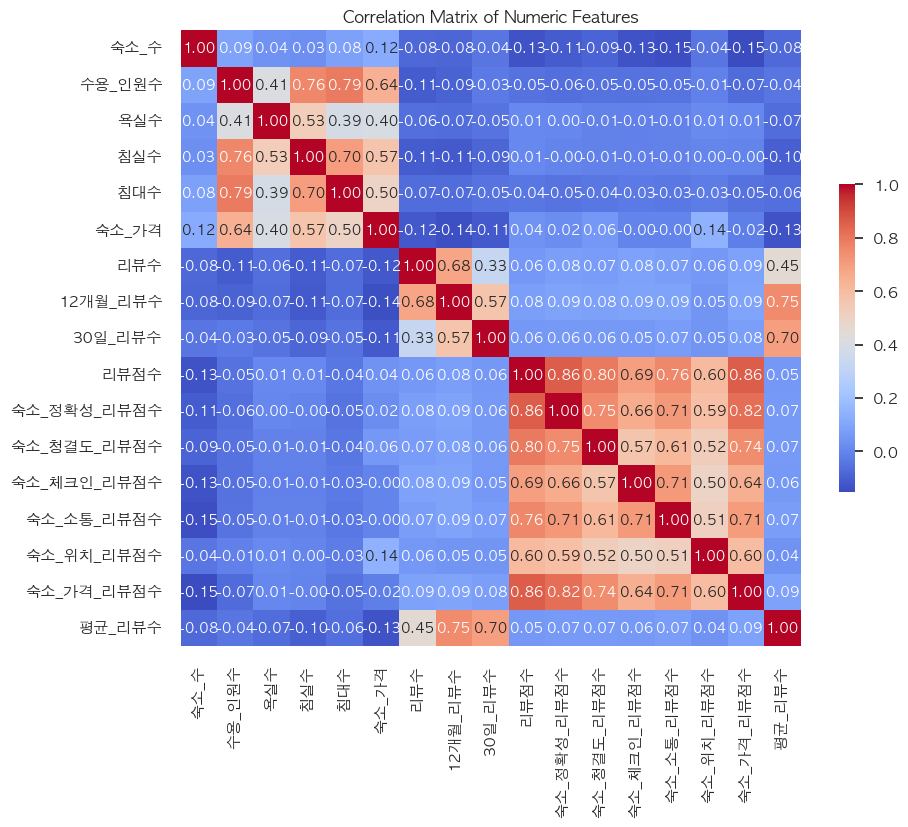

In [13]:
# 전체 데이터 상관계수
correlation_matrix_london = london_lists.corr()

# 히트맵
import seaborn as sns
import matplotlib.pyplot as plt

# 상관관계 히트맵 그리기
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_london, annot=True, cmap='coolwarm', fmt=".2f", cbar_kws={'shrink': 0.5}, annot_kws={'size': 10})
plt.title('Correlation Matrix of Numeric Features')
# plt.savefig('./heatmap.png', dpi=300)

plt.show()

#### 히트맵 해석 
1. 리뷰수와 리뷰 점수의 상관관계는 없다. >> 리뷰 수가 많을 수록 리뷰 점수가 올라가지는 않는다. 
    - 하지만 사람들은 (리뷰의 개수가 더 많은 상품의 리뷰점수)가 더 낮음에도 해당 상품을 선택하는 경향이 있음 >> Suboptional Choice
    - (https://journals.sagepub.com/doi/abs/10.1177/0956797617711291)
    - 추가 논문 검색 필수
2. 숙소의 가격이 비싸질수록 사람들은 숙소에 바라는 기대치가 올라갈 것으로 예측 (논문 기준 필요)
    - 상관관계가 나타나지 않는 것은 당연함. >> 만족도는 다를 수 있기 때문에
    - 숙소 가격 범위에 따른 편의시설 개수, 디스크립션 또는 텍스트 리뷰에 차이를 볼 수 있으면 봐보자.

#### 아직 남은 의문점 
1. 정확히 리뷰 점수는 비율 변수가 아닌 순위 변수인데.. >> 이거 처라리 4.8 이상과 4.8 이하로 나누는게 좋지 않을까? 근데 왜 4.8이지?
    - 전처리를 할 때 이걸 반영을 해야지 정확한 비교가 될 것 같긴 하네....

#### 슈퍼호스트별 히트맵

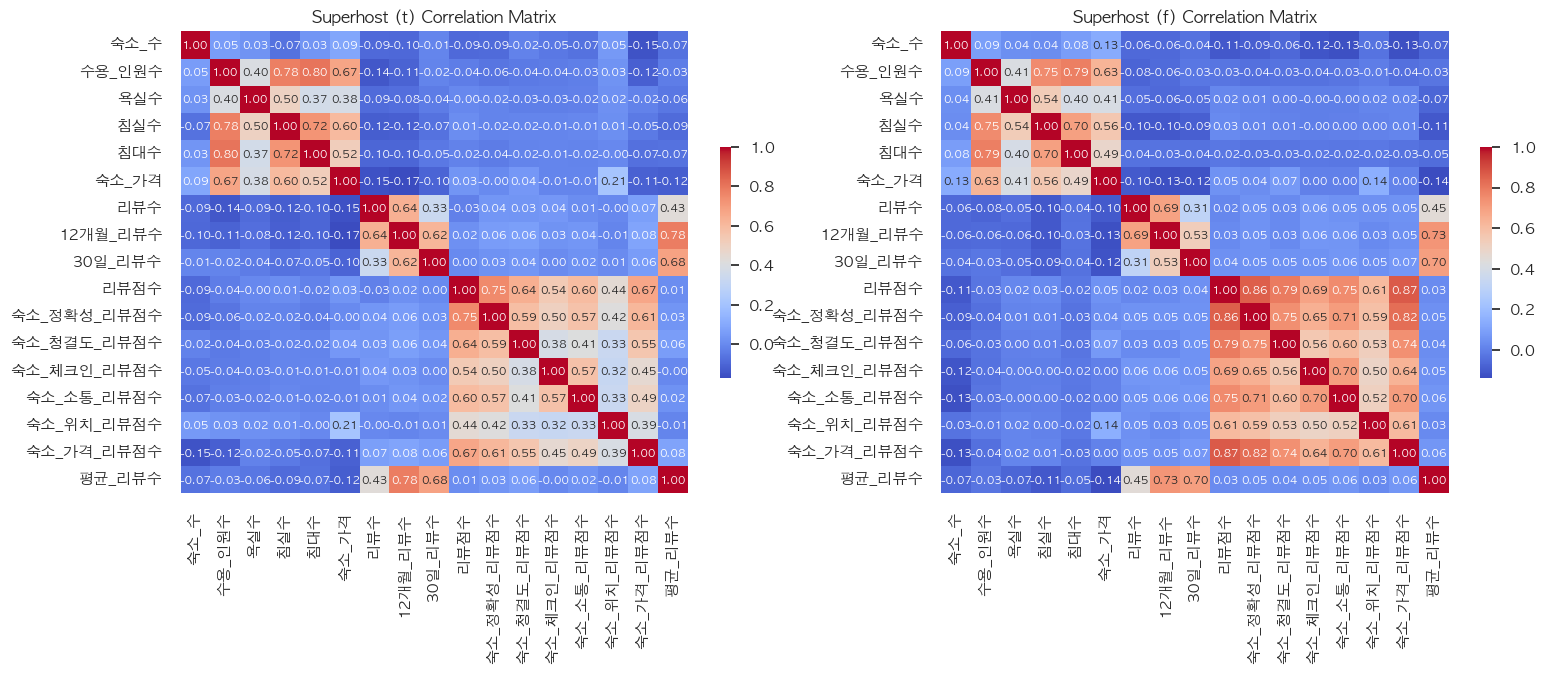

In [14]:
# 슈퍼호스트별 상관계수 
# 조건 아카이브
condition_superhost_t = london_lists['슈퍼호스트'] == 't'
condition_superhost_f = london_lists['슈퍼호스트'] == 'f'

# 슈퍼호스트별 DF 생성
london_superhost_t = london_lists[condition_superhost_t]
london_superhost_f = london_lists[condition_superhost_f]

# 슈퍼호스트별 상관계수
correlation_matrix_london_superhost = london_superhost_t.corr()
correlation_matrix_london_superhost_f = london_superhost_f.corr()

# 히트맵 조회 
import seaborn as sns
import matplotlib.pyplot as plt

# 두 개의 히트맵을 한 번에 그리기 위해 subplot을 사용
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# 슈퍼호스트인 경우 히트맵
sns.heatmap(correlation_matrix_london_superhost, ax=axes[0], annot=True, cmap='coolwarm', fmt=".2f",  cbar_kws={'shrink': 0.5},
            annot_kws={'size': 8})  # 글자 크기 조정
axes[0].set_title('Superhost (t) Correlation Matrix')

# 슈퍼호스트가 아닌 경우 히트맵
sns.heatmap(correlation_matrix_london_superhost_f, ax=axes[1], annot=True, cmap='coolwarm', fmt=".2f", cbar_kws={'shrink': 0.5},
            annot_kws={'size': 8})  # 글자 크기 조정
axes[1].set_title('Superhost (f) Correlation Matrix')

plt.show()

##### 히트맵을 보고 든 의문점
1. 슈퍼호스트일 경우 왜 리뷰점수와 각 기준별 리뷰점수의 상관계수가 떨어지지? 
    - 에어비앤비 리뷰점수는 어떻게 카운팅되는거였지?
        - 강제성 여부 
        - 리뷰점수 매기는 기준 : https://team3weeklyproject.slack.com/archives/C072RMAKFUM/p1717291395655919

    - 평점은 숙소 기준이고, 슈퍼호스트는 호스트 기준이다보니 차이가 날 수도 있음 
2. 슈퍼호스트 여부에 따른 리뷰점수에 따른 차이를 보려면 리뷰수가 같은 상태에서 차이를 내면 더 정확하지 않을까? 
    - 리뷰수를 구간 별로 나눠서 접근해봐도 괜찮지 않을까? 

### ANOVA
* 두 개 이상의 그룹 간의 평균 차이를 분석하는 방법 
* 범주형 데이터가 두 개 이상의 그룹으로 나뉘어질 때 사용
- 분산을 이용해 통계적 유의성을 검증 >> 분산 분석

#### 숙소_가격

In [15]:
from scipy.stats import f_oneway

# 함수 선언
def anova_result(standard, column):
    # Anova
    groupby_list  = london_lists.groupby(standard)[column].apply(list)
    f_stat, p_value = f_oneway(*groupby_list)
    # 출력
    if p_value > 0.05:
        result = '귀무가설 채택'
        trueorfalse = '없다.'
    else:
        result = "귀무가설 기각 > 대립가설 채택"
        trueorfalse = '있다.'
    print(f'{standard}별 {column} ANOVA(평균 값 차이) 분석: ')
    print(f"F-statistic: {f_stat}, p-value: {p_value}")
    print(f"{result} : {standard}별 {column} 평균 값의 차이가 {trueorfalse}")

# 카테고리 타입 컬럼 변수로 저장
category_columns = ['슈퍼호스트', '숙소_유형', '숙소_특징', '숙소_지역', '호스트_신원', '프로필_사진', '답변_평균시간']

# 컬럼별 숙소_가격 Anova 분석 
for col in category_columns:
    anova_result(col, '숙소_가격')
    print()
    print('-' * 60)
    print()

슈퍼호스트별 숙소_가격 ANOVA(평균 값 차이) 분석: 
F-statistic: 15.69985108856591, p-value: 7.438319176569953e-05
귀무가설 기각 > 대립가설 채택 : 슈퍼호스트별 숙소_가격 평균 값의 차이가 있다.

------------------------------------------------------------

숙소_유형별 숙소_가격 ANOVA(평균 값 차이) 분석: 
F-statistic: 5321.967717350215, p-value: 0.0
귀무가설 기각 > 대립가설 채택 : 숙소_유형별 숙소_가격 평균 값의 차이가 있다.

------------------------------------------------------------

숙소_특징별 숙소_가격 ANOVA(평균 값 차이) 분석: 
F-statistic: nan, p-value: nan
귀무가설 기각 > 대립가설 채택 : 숙소_특징별 숙소_가격 평균 값의 차이가 있다.

------------------------------------------------------------

숙소_지역별 숙소_가격 ANOVA(평균 값 차이) 분석: 
F-statistic: 184.84020474566978, p-value: 0.0
귀무가설 기각 > 대립가설 채택 : 숙소_지역별 숙소_가격 평균 값의 차이가 있다.

------------------------------------------------------------

호스트_신원별 숙소_가격 ANOVA(평균 값 차이) 분석: 
F-statistic: 33.816058629005475, p-value: 6.1124213374990385e-09
귀무가설 기각 > 대립가설 채택 : 호스트_신원별 숙소_가격 평균 값의 차이가 있다.

------------------------------------------------------------

프로필_사진별 숙소_가격 ANOVA(평균 값 차이) 분석: 

/Users/minseokpark/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/_stats_py.py:3869: DegenerateDataWarning: at least one input has length 0
  warnings.warn(stats.DegenerateDataWarning('at least one input '


#### 리뷰점수

In [16]:
# 컬럼별 리뷰점수 Anova 분석 
for col in category_columns:
    anova_result(col, '리뷰점수')
    print()
    print('-' * 60)
    print()

슈퍼호스트별 리뷰점수 ANOVA(평균 값 차이) 분석: 
F-statistic: 2278.72363119673, p-value: 0.0
귀무가설 기각 > 대립가설 채택 : 슈퍼호스트별 리뷰점수 평균 값의 차이가 있다.

------------------------------------------------------------

숙소_유형별 리뷰점수 ANOVA(평균 값 차이) 분석: 
F-statistic: 41.26492917458092, p-value: 1.3141924912537902e-26
귀무가설 기각 > 대립가설 채택 : 숙소_유형별 리뷰점수 평균 값의 차이가 있다.

------------------------------------------------------------

숙소_특징별 리뷰점수 ANOVA(평균 값 차이) 분석: 
F-statistic: nan, p-value: nan
귀무가설 기각 > 대립가설 채택 : 숙소_특징별 리뷰점수 평균 값의 차이가 있다.

------------------------------------------------------------

숙소_지역별 리뷰점수 ANOVA(평균 값 차이) 분석: 
F-statistic: 16.64340147775773, p-value: 2.7986027976298666e-91
귀무가설 기각 > 대립가설 채택 : 숙소_지역별 리뷰점수 평균 값의 차이가 있다.

------------------------------------------------------------

호스트_신원별 리뷰점수 ANOVA(평균 값 차이) 분석: 
F-statistic: 23.787761312278665, p-value: 1.080553131203471e-06
귀무가설 기각 > 대립가설 채택 : 호스트_신원별 리뷰점수 평균 값의 차이가 있다.

------------------------------------------------------------

프로필_사진별 리뷰점수 ANOVA(평균 값 차이

/Users/minseokpark/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/_stats_py.py:3869: DegenerateDataWarning: at least one input has length 0
  warnings.warn(stats.DegenerateDataWarning('at least one input '


슈퍼호스트 여부, 숙소 유형, 숙소 특징, 숙소 지역 모두 리뷰 점수 즉 고객이 느끼는 좋은 숙소의 조건으로 활용이 가능하다는 의미.

 
 어떤 관계가 있지? 여기를 파고 들자.

### 카이제곱 검정

In [17]:
from scipy.stats import chi2_contingency

def chi2_result(column1, column2):
    # chi2
    contingency_table = pd.crosstab(london_lists[column1], london_lists[column2])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    # 출력
    if p > 0.05:
        result = '귀무가설 채택'
        trueorfalse = '상호 독립적이다.'
    else:
        result = "귀무가설 기각 > 대립가설 채택"
        trueorfalse = '독립적이지 않고, 연관성이 있다.'
    
    print(f'{column1}과 {column2}의 독립성 분석: ')
    print(f"Chi-squared: {chi2}, p-value: {p}")
    print(f"{result} : {column1}과(와) {column2}는 {trueorfalse}")
    print()
    print('-' * 60)
    print()

category_columns = ['슈퍼호스트', '숙소_유형', '숙소_특징', '숙소_지역', '호스트_신원', '프로필_사진', '답변_평균시간']

# Chi-squared 결과 조회
for i in range(len(category_columns)):
    for j in range(i+1, len(category_columns)):
        chi2_result(category_columns[i], category_columns[j])


슈퍼호스트과 숙소_유형의 독립성 분석: 
Chi-squared: 711.6196525627903, p-value: 6.344959818718997e-154
귀무가설 기각 > 대립가설 채택 : 슈퍼호스트과(와) 숙소_유형는 독립적이지 않고, 연관성이 있다.

------------------------------------------------------------

슈퍼호스트과 숙소_특징의 독립성 분석: 
Chi-squared: 1468.3183702409651, p-value: 6.472226853525205e-262
귀무가설 기각 > 대립가설 채택 : 슈퍼호스트과(와) 숙소_특징는 독립적이지 않고, 연관성이 있다.

------------------------------------------------------------

슈퍼호스트과 숙소_지역의 독립성 분석: 
Chi-squared: 399.41920271739673, p-value: 4.9026114746035345e-65
귀무가설 기각 > 대립가설 채택 : 슈퍼호스트과(와) 숙소_지역는 독립적이지 않고, 연관성이 있다.

------------------------------------------------------------

슈퍼호스트과 호스트_신원의 독립성 분석: 
Chi-squared: 151.15413208787209, p-value: 9.698401463753453e-35
귀무가설 기각 > 대립가설 채택 : 슈퍼호스트과(와) 호스트_신원는 독립적이지 않고, 연관성이 있다.

------------------------------------------------------------

슈퍼호스트과 프로필_사진의 독립성 분석: 
Chi-squared: 89.70294968091527, p-value: 2.7674210806883455e-21
귀무가설 기각 > 대립가설 채택 : 슈퍼호스트과(와) 프로필_사진는 독립적이지 않고, 연관성이 있다.

--------------------------

- 슈퍼호스트 여부는 숙소 유형, 숙소 특징, 숙소 지역과 독립적이지 않음. 
    - 이는 슈퍼호스트가 특정 유형 / 특징 의 숙소를 더 많이 관리하며, 특정 지역에 더 많이 존재할 가능성이 있다는 것을 의미
<br />
- 숙소 유형은 숙소 지역과도 독립적이지 않음. 이는 특정 유형의 숙소가 특정 지역에 더 많이 위치한다는 것을 의미


## 위치
- 위치라는 말에 내포된 의미 분류 (숙소_지역이나 위도, 경도로 어떤 파생변수를 만들어낼 수 있는지 고민해보자.)
1. 지역
    - 서울로 치면 강남구에 위치했나, 종로구에 위치하는가 등
    - 근데 이것도 아예 2번과 아예 분리해서 생각할 수는 없다.
2. 랜드마크로부터 떨어진 거리 
3. 대중교통 접근성 
    - 기차역 / 지하철 역과의 거리 등 
4. 편의시설 

<br />

- 이것도 논문 좀 찾아봐야겠는데?


## 슈퍼호스트와 슈퍼호스트 기준을 충족하는 숙소(파생변수)에 따른 유의미한 차이가 있나?

## 숙소 특징에 따른 리뷰 점수 상관관계
- 이거를 제대로 보려면 상위 숙소만 뽑으면 안돼. 
- 특이한 숙소를 사람들이 더 선호할 수도 있음. 
- 가격과 다른 컬럼의 상관관계 때문에 날린건데, 가격과 다른 컬럼의 상관관계는 이제 중요하지 않아졌음. 

## 지금와서 생각해보니.. 숙소의 크기에 따라 가격이 달라진다고 생각한거 자체가 말이 안되네....
- 숙소 가격은 아무리 생각해봐도 클러스터링 기반의 이상치 제거를 하는게 맞는것같다...